<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/dataworkshop/10_praktyczne_uczenie_maszynowe_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Z jego pliku understand_business_data.ipynb**

In [ ]:
# https://github.com/dataworkshop/webinar-titanic/tree/master/notebooks
print("Sposób odczytu pliku wziąłem z książki 'Uczenie maszynowe' rozdz.2 ćw 3")
print("Jednak dorzuciłem foldery input i output.")
 
import os
 
TITANIC_INPUT_PATH = os.path.join("datasets", "titanic", "input")
TITANIC_OUTPUT_PATH = os.path.join("datasets", "titanic", "output")
 
import pandas as pd
 
def load_titanic_data(filename, titanic_path=TITANIC_INPUT_PATH):
    # te dwie linijki wziąłem z kodu z rozdziału 2 (początek)
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)
 
df_train = load_titanic_data("train.csv")
df_test = load_titanic_data("test.csv")

Sposób odczytu pliku wziąłem z książki 'Uczenie maszynowe' rozdz.2 ćw 3
Jednak dorzuciłem foldery input i output.


In [ ]:
print("train rozmiar", df_train.shape)
print("test rozmiar", df_test.shape)
print("test nie ma kolumny Survived, którą mam przewidzieć")

train rozmiar (891, 12)
test rozmiar (418, 11)
test nie ma kolumny Survived, którą mam przewidzieć


In [ ]:
print("Tyle jest wszstkich wierszy. Sumuję pierwsze liczby z krotek.")
print(df_train.shape[0] + df_test.shape[0])

Tyle jest wszstkich wierszy. Sumuję pierwsze liczby z krotek.
1309


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Features¶
PassengerId - A numerical id assigned to each passenger

Survived - Whether the passenger survived (1), or didn't (0). Target variable.

Pclass - Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower)

Name - The name of the passenger

Sex - The gender of the passenger (male or female)

Age - The age of the passenger

SibSp - # of siblings (brother, sister, stepbrother, stepsister) / spouses (husband, wife [mistresses and fiancés were ignored]) aboard the Titanic rodzeństwo i małżonkowie

Parch (parents i children)- # of parents (mother, father) / children (daughter, son, stepdaughter, stepson) aboard the Titanic. Note: Some children travelled only with a nanny, therefore parch=0 for them..

Ticket - The ticket number of the passenger

Fare - How much the passenger paid for the ticker

Cabin - Cabin number

Embarked - Where the passenger boarded the 
Titanic Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
print("Tyle osób przeżyło ze względu na klasę i wiek.")
print(df_train.groupby(["Pclass", "Sex"])["Survived"].value_counts())

print()
print("Tyle osób przeżyło procentowo.")
print(df_train.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

Tyle osób przeżyło ze względu na klasę i wiek.
Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

Tyle osób przeżyło procentowo.
Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived

## Train vs Test

In [ ]:
print("Sprawdzamy czy zbiór testowy i treningowy się różnią (im mniej tym lepiej).")
print("Na podstawie tylko niektórych cech.")

describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

print()
print("Train: males")
print(df_train[df_train["Sex"] == "male"][describe_fields].describe())

print()
print("Test: males")
print(df_test[df_test["Sex"] == "male"][describe_fields].describe())

print()
print("Train: females")
print(df_train[df_train["Sex"] == "female"][describe_fields].describe())

print()
print("Test: females")
print(df_test[df_test["Sex"] == "female"][describe_fields].describe())

Sprawdzamy czy zbiór testowy i treningowy się różnią (im mniej tym lepiej).
Na podstawie tylko niektórych cech.

Train: males
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    0.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    5.000000

Test: males
              Age        Fare      Pclass       SibSp       Parch
count  205.000000  265.000000  266.000000  266.000000  266.000000
mean    30.272732   27.527877    2.334586    0.379699    0.274436
std     13.389528   41.079423    0.808497    0.843735    0.883745
min

# **Z jego pliku basic_model.ipynb**

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier  # zwraca średnią wartość z tych którzy przeżyją
from sklearn.metrics import accuracy_score

In [ ]:
print("Funkcja sample losuje tyle wierszy ile podam w argumencie")
print(df_train.sample(10))

Funkcja sample losuje tyle wierszy ile podam w argumencie
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
646          647         0       3  ...   7.8958   NaN         S
244          245         0       3  ...   7.2250   NaN         C
577          578         1       1  ...  55.9000   E44         S
725          726         0       3  ...   8.6625   NaN         S
229          230         0       3  ...  25.4667   NaN         S
549          550         1       2  ...  36.7500   NaN         S
529          530         0       2  ...  11.5000   NaN         S
133          134         1       2  ...  26.0000   NaN         S
231          232         0       3  ...   7.7750   NaN         S
652          653         0       3  ...   8.4333   NaN         S

[10 rows x 12 columns]


In [ ]:
print("Tablica X z cechami. Wyświetlam 5 początkowych")
X = df_train[["Pclass"]].values
print(X[:5])
print(type(X))

print()
print("Zmienna docelowa y. Wyświetlam 5 początkowych.")
y = df_train["Survived"].values
print(y[:5])
print(type(y))

Tablica X z cechami. Wyświetlam 5 początkowych
[[3]
 [1]
 [3]
 [1]
 [3]]
<class 'numpy.ndarray'>

Zmienna docelowa y. Wyświetlam 5 początkowych.
[0 1 1 1 0]
<class 'numpy.ndarray'>


In [ ]:
print("Tworzy instancję modelu.")
model = DummyClassifier()
print("Trenuje model.")
model.fit(X,y)
print("Predykcja czy osoba przeżyje czy nie - na podstawie klasy którą podróżował.")
y_pred = model.predict(X)

print("Wynik przewidywania y_pred w porównaniu do wartości prawidłowej y")
print("Używam metryki accuracy, która mówi jak często model trafia")
score = accuracy_score(y, y_pred)
print("score: %.2f" % score)
print("To słaby wynik, ale najpierw warto robić ten basic model, bo on porównuje z innymi.")
print("Jeśli ten jest dobry, to nie ma sensu robić innego i walczyć o 0,1%.")

Tworzy instancję modelu.
Trenuje model.
Predykcja czy osoba przeżyje czy nie - na podstawie klasy którą podróżował.
Wynik przewidywania y_pred w porównaniu do wartości prawidłowej y
Używam metryki accuracy, która mówi jak często model trafia
score: 0.51
To słaby wynik, ale najpierw warto robić ten basic model, bo on porównuje z innymi.
Jeśli ten jest dobry, to nie ma sensu robić innego i walczyć o 0,1%.


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


## **Prediction**

In [ ]:
print("Predykcja na zbiorze test. Równeż biorę tylko klasę pasażera.")

X = df_test[["Pclass"]].values

print("Taki jest wynik, czyli prognozy o przeżyciu lub nie.")
print(model.predict(X))

print()
print("W df_test tworzę nową kolumnę 'Survived' w df_test")
print("i przypisuję do niej prognozowane wyniki")
df_test["Survived"] = model.predict(X)

print("Zapisuję dwie kolumny do pliku csv. Robię index=False, żeby nie dodawał kolumny indeksów.")
if not os.path.isdir(TITANIC_OUTPUT_PATH):  # jeśli nie ma folderu datasets/titanic/output
        os.makedirs(TITANIC_OUTPUT_PATH)  # to go tworzy
# zapisuje dwie kolumny do pliku dummy.csv w tym folderze (bez kolumny indeksów)
df_test[["PassengerId", "Survived"]].to_csv(os.path.join(TITANIC_OUTPUT_PATH, 'dummy.csv'), index=False)

Predykcja na zbiorze test. Równeż biorę tylko klasę pasażera.
Taki jest wynik, czyli prognozy o przeżyciu lub nie.
[0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1
 0 1 1 0 1 0 0 1 0 1 1]

W df_test tworzę nową kolumnę 'Surv

# **Z jego pliku feature_engineering.ipynb**

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(2018)

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_validate

import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print("Połączy dwie tabele w jedną. Indeksy zostają z każdej z df")
df_all = pd.concat([df_train, df_test])
print(df_all)
print("Rozmiar")
print(df_all.shape)
print("Nazwy kolumn")
print(df_all.columns)
print("Indeksy df_all")
print(df_all.index)
print("Indeksy df_train")
print(df_train.index)
print("Indeksy df_test")
print(df_test.index)

Połączy dwie tabele w jedną. Indeksy zostają z każdej z df
     PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0              1         0       3  ...    7.2500   NaN         S
1              2         1       1  ...   71.2833   C85         C
2              3         1       3  ...    7.9250   NaN         S
3              4         1       1  ...   53.1000  C123         S
4              5         0       3  ...    8.0500   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305         0       3  ...    8.0500   NaN         S
414         1306         1       1  ...  108.9000  C105         C
415         1307         1       3  ...    7.2500   NaN         S
416         1308         1       3  ...    8.0500   NaN         S
417         1309         0       3  ...   22.3583   NaN         C

[1309 rows x 12 columns]
Rozmiar
(1309, 12)
Nazwy kolumn
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 

In [ ]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S


In [ ]:
print("Cechy, które są int lub float z df_train")
df_train.select_dtypes(include=[np.int, np.float]).head()

Cechy, które są int lub float z df_train


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
print("Sam oswajam się z funkcją factorize.")
print("Unikalne wartości kolumny płeć.")
print(df_all["Sex"].unique())
print("Konwertuję płeć do wartości numerycznej, funkcją factorize.")
print("Zwraca ona dwa wektory. Pierwszy to wartości numeryczne a drugi to labele.")
print(pd.factorize(df_all["Sex"]))
print("Ale nam potrzebny tylko pierwszy wektor.")
print(pd.factorize(df_all["Sex"])[0])
moja_nazwa_sex_po_faktoryzacji = pd.factorize(df_all["Sex"])[0]
print(moja_nazwa_sex_po_faktoryzacji)
print("Wyświetlam obok siebie kolumny Sex oraz nową sfaktoryzowaną (pierwsze 10)")
porownane_sex = zip(df_all["Sex"].values, moja_nazwa_sex_po_faktoryzacji)
print(list(porownane_sex)[:10])
print("Male to 0, a female to 1.")

print()
print("Unikalne wartości kolumny port. Zdarzyły się w train dwie wartości nan czyli brak info.")
print(df_all["Embarked"].unique())
print("Konwertuję port i do wartości numerycznej, funkcją factorize.")
print("Zwraca ona dwa wektory. Pierwszy to wartości numeryczne a drugi to labele.")
print(pd.factorize(df_all["Embarked"]))
print("Ale nam potrzebny tylko pierwszy wektor.")
print(pd.factorize(df_all["Embarked"])[0])
print("moja_nazwa_embarked_po_faktoryzacji")
moja_nazwa_embarked_po_faktoryzacji = pd.factorize(df_all["Embarked"])[0]
print(moja_nazwa_embarked_po_faktoryzacji)
print("Wyświetlam obok siebie kolumny Embarked oraz nową sfaktoryzowaną (pierwsze 10)")
porownane_embarked = zip(df_all["Embarked"].values, moja_nazwa_embarked_po_faktoryzacji)
print(list(porownane_embarked)[:10])
print("S czyli Southampton to 0.") 
print("C czyli Cherbourg to 1.")
print("Q czyli Queenstown to 2.")

Sam oswajam się z funkcją factorize.
Unikalne wartości kolumny płeć.
['male' 'female']
Konwertuję płeć do wartości numerycznej, funkcją factorize.
Zwraca ona dwa wektory. Pierwszy to wartości numeryczne a drugi to labele.
(array([0, 1, 1, ..., 0, 0, 0]), Index(['male', 'female'], dtype='object'))
Ale nam potrzebny tylko pierwszy wektor.
[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]
Wyświetlam obok siebie kolumny Sex oraz nową sfaktoryzowaną (pierwsze 10)
[('male', 0), ('female', 1), ('female', 1), ('female', 1), ('male', 0), ('male', 0), ('male', 0), ('male', 0), ('female', 1), ('female', 1)]
Male to 0, a female to 1.

Unikalne wartości kolumny port. Zdarzyły się w train dwie wartości nan czyli brak info.
['S' 'C' 'Q' nan]
Konwertuję port i do wartości numerycznej, funkcją factorize.
Zwraca ona dwa wektory. Pierwszy to wartości numeryczne a drugi to labele.
(array([0, 1, 0, ..., 0, 0, 1]), Index(['S', 'C', 'Q'], dtype='object'))
Ale nam potrzebny tylko pierwszy wektor.
[0 1 0 ... 0 0 1]
moja_naz

In [ ]:
print("Nie chcemy używać PassangerId, bo nie ma wpływu na przeżycie.")
print("Nie chcemy też Survived bo to nasz cel. One będą na black_list.")

print("Definicja funkcji pobierającej cechy numeryczne, ale oprócz tych z black_list.")
def get_feats(df):
    feats = df.select_dtypes(include=[np.int]).columns.values
    black_list = ['PassengerId', 'Survived']

    return [feat for feat in feats if feat not in black_list]


print("Zamiana cech słownych takich jak płeć i port na numeryczne.")
print("Dodaje dwie nowe cechy sex_cat i embarked_cat (cat jak category) do df_all")
def feature_engineering(df):
    df['sex_cat'] = pd.factorize(df['Sex'])[0]  # płeć zamieniam numer 0,1
    df['embarked_cat'] = pd.factorize(df["Embarked"])[0]  # port zamieniam na numer 0,1,2

    return df


print("Cztery modele. Zwraca listę krotek.")
def get_models():
    return [
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('et', ExtraTreesClassifier()),
    ]

Nie chcemy używać PassangerId, bo nie ma wpływu na przeżycie.
Nie chcemy też Survived bo to nasz cel. One będą na black_list.
Definicja funkcji pobierającej cechy numeryczne, ale oprócz tych z black_list.
Zamiana cech słownych takich jak płeć i port na numeryczne.
Dodaje dwie nowe cechy sex_cat i embarked_cat (cat jak category) do df_all
Cztery modele. Zwraca listę krotek.


In [ ]:
print("Wizualizacja wyniku")
def plot_result(model_name, result, ylim=(0, 1.)):
    # rzucał key-error, bo nie ma takiego klucza w słowniku result, 
    # ale pomogła rada z github:
    # /Users/vova/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: 
    # FutureWarning: You are accessing a training score ('train_score'), 
    # which will not be available by default any more in 0.21. 
    # If you need training scores, please set return_train_score=True
    # warnings.warn(*warn_args, **warn_kwargs)
    # Ja mam sklearn wersję 0.22.2.post1, więc u mnie depreciated

    mean_train = np.round( np.mean(result['train_score']), 2 ) 
    mean_test = np.round( np.mean(result['test_score']), 2 )
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    # rzucał key-error, ale już ok
    plt.plot( result['train_score'], 'r-o', label="train" )  # r to red, a o to kropka
    plt.plot( result['test_score'], 'g-o', label="test" ) # g to green, a o to kropka
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

Wizualizacja wyniku


In [ ]:
print("Sprawdzam wersję sklearn, bo był błąd KeyError: 'train_score' w słowniku result.")
import sklearn
sklearn.__version__

Sprawdzam wersję sklearn, bo był błąd KeyError: 'train_score' w słowniku result.


'0.22.2.post1'

Bierze df_train i dorzuca do niej nowe cechy sex_cat i embarked_cat.
Wynik zwraca do df.
Pobiera z df cechy numeryczne, ale oprócz PassengerId i Survived.
Wynik powinien zapisać do listy, więc utworzyłem taką listę.
['Pclass', 'SibSp', 'Parch', 'sex_cat', 'embarked_cat']
Przypomnienie df_train
     PassengerId  Survived  Pclass  ... Embarked sex_cat  embarked_cat
0              1         0       3  ...        S       0             0
1              2         1       1  ...        C       1             1
2              3         1       3  ...        S       1             0
3              4         1       1  ...        S       1             0
4              5         0       3  ...        S       0             0
..           ...       ...     ...  ...      ...     ...           ...
886          887         0       2  ...        S       0             0
887          888         1       1  ...        S       1             0
888          889         0       3  ...        S       1          

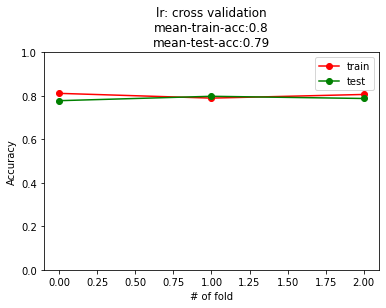

dt
To wyświetlanie sam dodałem
fit_time [0.0016048  0.00115824 0.00069284]
score_time [0.0007     0.00083494 0.00034142]
test_score [0.77777778 0.7979798  0.77441077]
train_score [0.85016835 0.83501684 0.84343434]
mean train score
0.8428731762065095
mean test score
0.7833894500561168
Typ zmiennej result
<class 'dict'>


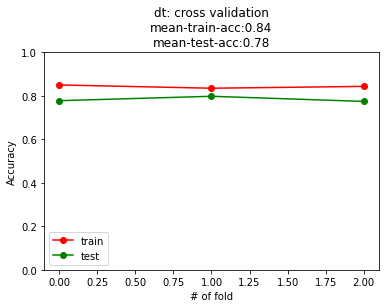

rf
To wyświetlanie sam dodałem
fit_time [0.15443611 0.13610744 0.14107656]
score_time [0.0144124  0.01052141 0.01062322]
test_score [0.77104377 0.77441077 0.78787879]
train_score [0.85016835 0.83501684 0.84343434]
mean train score
0.8428731762065095
mean test score
0.7777777777777777
Typ zmiennej result
<class 'dict'>


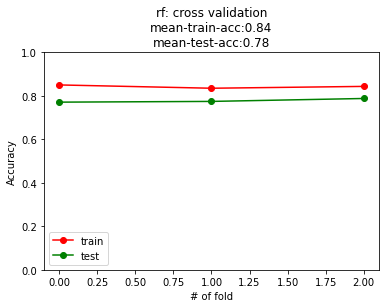

et
To wyświetlanie sam dodałem
fit_time [0.10983467 0.10631967 0.10586023]
score_time [0.01089239 0.01074314 0.0107429 ]
test_score [0.77441077 0.7979798  0.79124579]
train_score [0.85016835 0.83501684 0.84343434]
mean train score
0.8428731762065095
mean test score
0.787878787878788
Typ zmiennej result
<class 'dict'>


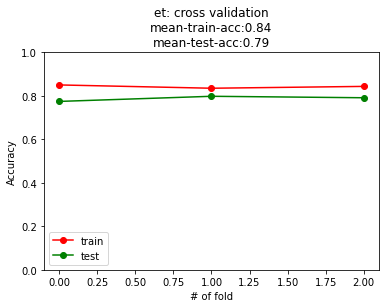

In [ ]:
print("Bierze df_train i dorzuca do niej nowe cechy sex_cat i embarked_cat.")
print("Wynik zwraca do df.")
df = feature_engineering(df_train)
print("Pobiera z df cechy numeryczne, ale oprócz PassengerId i Survived.")
print("Wynik powinien zapisać do listy, więc utworzyłem taką listę.")
moja_lista_dobrych_cech_numerycznych = get_feats(df)
print(moja_lista_dobrych_cech_numerycznych)


print("Przypomnienie df_train")
print(df_train)

print()
print("Takie cechy będą w numpy.ndarray o nazwie X")
print(get_feats(df_train))
X = df_train[ get_feats(df_train) ].values
print()
print("X =")
print(X)
print("type(X)", type(X))

print()
print("Natomiast w numpy.ndarray o nazwie y jest cecha Survived")
y = df_train[ 'Survived' ].values
print()
print("y =")
print(y)
print("type(y)", type(y))

print()
print("Bada model w zależności od pięciu cech.")
print("Wtedy dummy badał tylko w zależności od klasy pasażera.")
for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_train_score=True)
    print(model_name)
    print("To wyświetlanie sam dodałem")
    for key, value in result.items():
        print(key, value)

    print("mean train score")
    print(result["train_score"].mean())
    print("mean test score")
    print(result["test_score"].mean())

    print("Typ zmiennej result")
    print(type(result))

    plot_result(model_name, result)

In [ ]:
def make_prediction(df_train, df_test, model, output_file_name):
    
    # Dodaje dwie nowe cechy sex_cat i embarked_cat
    # (cat jak category) do df_train i zwraca train.
    train = feature_engineering(df_train)
    # Dodaje dwie nowe cechy sex_cat i embarked_cat
    # (cat jak category) do df_test i zwraca test.
    test = feature_engineering(df_test)

    # pobiera z train tylko cechy numeryczne (oprócz PassgngerId i Survived) 
    feats = get_feats(train)

    # do X_train bierze tylko wyselekcjonowane cechy numeryczne
    X_train = train[feats].values
    # sam dopisałem żeby wyświetlał X_train
    print()
    print("X_train z funkcji make_prediction")
    print(X_train)
    y_train = train['Survived'].values
    # sam dopisałem żeby wyświetlał y_train
    print()
    print("y_train z funkcji make_prediction")
    print(y_train)
    X_test = test[feats]
    # sam dopisałem żeby wyświetlał X_test
    print()
    print("X_test z funkcji make_prediction")
    print(X_test)

    print(model)
    model.fit(X_train, y_train)

    # przypisuje wyniki predykcji zbioru testowego do nowej kolumny z zbiorze test
    test['Survived'] = model.predict(X_test)
    # zapisuje dwie kolumny z wyników prognoz do plików csv (bez kolumny indeksów)
    test[ ['PassengerId', 'Survived'] ].to_csv(os.path.join(TITANIC_OUTPUT_PATH, output_file_name), index=False)

## **Linear model**

In [ ]:
make_prediction(df_train, df_test, LogisticRegression(), 'linear.csv')


X_train z funkcji make_prediction
[[3 1 0 0 0]
 [1 1 0 1 1]
 [3 0 0 1 0]
 ...
 [3 1 2 1 0]
 [1 0 0 0 1]
 [3 0 0 0 2]]

y_train z funkcji make_prediction
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 

## **Random forest**

Dla głębokości 2,4,6,8


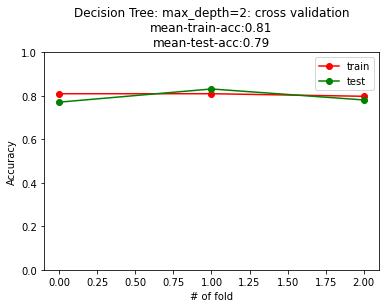

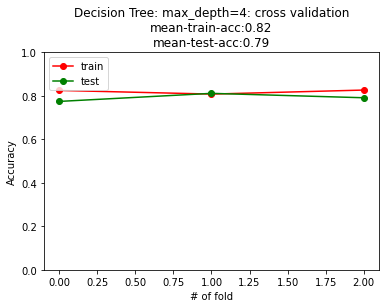

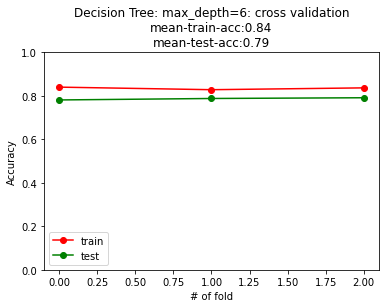

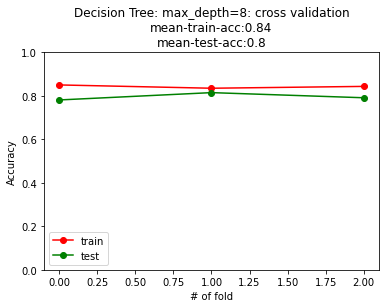

In [ ]:
print("Dla głębokości 2,4,6,8")
for max_depth in range(2, 10, 2):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=15)
    # dopisałem return_train_score=True bo był key error dla train_score
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_train_score=True)
    # wywołuję zdefiniowaną funkcję plot_result
    plot_result("Decision Tree: max_depth=%s" % max_depth, result)

Dla głębokości 3,4,5


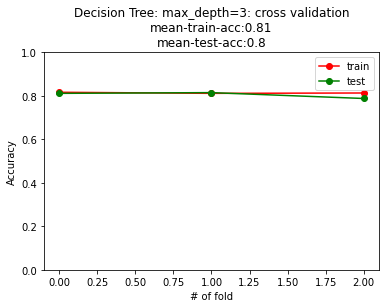

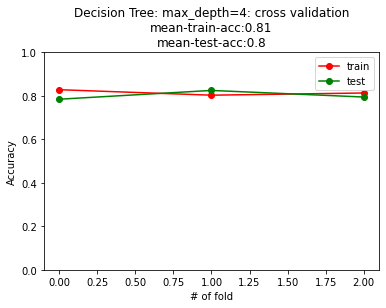

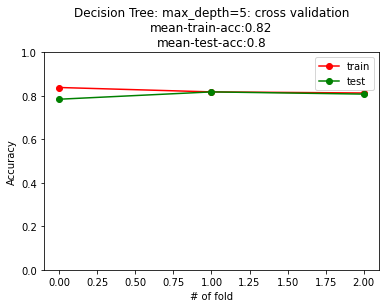

In [ ]:
print("Dla głębokości 3,4,5")
for max_depth in range(3, 6, 1):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=15)
    # dopisałem return_train_score=True bo był key error dla train_score
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_train_score=True)
    # wywołuję zdefiniowaną funkcję plot_result
    plot_result("Decision Tree: max_depth=%s" % max_depth, result)

In [ ]:
print("Zapis do pliku fr_md4_ne15.csv")
model = RandomForestClassifier(max_depth=4, n_estimators=15, random_state=2018)
make_prediction(df_train, df_test, model, 'rf_md4_ne15.csv')

Zapis do pliku fr_md4_ne15.csv

X_train z funkcji make_prediction
[[3 1 0 0 0]
 [1 1 0 1 1]
 [3 0 0 1 0]
 ...
 [3 1 2 1 0]
 [1 0 0 0 1]
 [3 0 0 0 2]]

y_train z funkcji make_prediction
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 

## **Feature Engineering**

### **Titles**

In [ ]:
print("Przypomninie kolumny Name")
df_train["Name"]

Przypomninie kolumny Name


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
print("Tytuły honorowe w df_train")
df_train['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower() ).value_counts()

Tytuły honorowe w df_train


 mr              517
 miss            182
 mrs             125
 master           40
 dr                7
 rev               6
 major             2
 mlle              2
 col               2
 don               1
 lady              1
 jonkheer          1
 sir               1
 mme               1
 the countess      1
 ms                1
 capt              1
Name: Name, dtype: int64

In [ ]:
print("Tytuły honorowe w df_test")
df_test['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower() ).value_counts()
print("Jest tytuł dona, którego nie ma w df_train. Dlatego trzeba połączyć w df_all.")

Tytuły honorowe w df_test
Jest tytuł dona, którego nie ma w df_train. Dlatego trzeba połączyć w df_all.


In [ ]:
print("Tytuły honorowe w df_all")
df_all['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower() ).value_counts()

Tytuły honorowe w df_all


 mr              757
 miss            260
 mrs             197
 master           61
 dr                8
 rev               8
 col               4
 mlle              2
 ms                2
 major             2
 capt              1
 don               1
 sir               1
 lady              1
 jonkheer          1
 mme               1
 the countess      1
 dona              1
Name: Name, dtype: int64

In [ ]:
popular_titles = ["mr", "miss", "mrs", "master", "dr", "rev"]
df_all['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower().strip() ).map(lambda x: x if x in popular_titles else "other").value_counts()

mr        757
miss      260
mrs       197
master     61
other      18
dr          8
rev         8
Name: Name, dtype: int64

In [ ]:
def feature_title(df):
    # Tworzy nową kolumnę title
    df['title'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower().strip() )
    popular_titles = ["mr", "miss", "mrs", "master", "dr", "rev"]
    # rzadkie tytuły wrzuca do other
    df['title_norm'] = df['title'].map(lambda x: x if x in popular_titles else "other")
    # koduje tytuły na cyfry
    df['title_norm_cat'] = pd.factorize( df['title_norm'] )[0]  
    
    return df

In [ ]:
df = feature_title(df_all)
# rozkład wartości kolumny title_norm
df['title_norm'].value_counts()

mr        757
miss      260
mrs       197
master     61
other      18
dr          8
rev         8
Name: title_norm, dtype: int64

### **Cabin**

In [ ]:
# jeśli pasażer w cabin ma nan, to wpisz missing. Jeśli ma kabinę to pobierz pierwszą literę
# Następnie wyświetl rozkład poprzez value_counts()
df_all['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] ).value_counts()

missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Cabin, dtype: int64

### **Family relationships**

In [ ]:
# suma parents, children, sibliding i spouse. Rozkład tej sumy
df_all.apply(lambda x: x['Parch'] + x['SibSp'], axis=1).value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
dtype: int64

### **Age**

In [ ]:
print(df_all.shape)
print(df_all.Age.describe())
print("Obliczyłem jest osób, u których nie podano wieku")
print(df_all.shape[0], "-", df_all.Age.describe()[0], "=", df_all.shape[0]-df_all.Age.describe()[0])

(1309, 15)
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64
Obliczyłem jest osób, u których nie podano wieku
1309 - 1046.0 = 263.0


In [ ]:
print("Dodaje trzy kolumny o tytułach.")
df = feature_title(df_all)
print(df)

print()
print("Rozkład kolumny wiek. Jest dużo pustych.")
print("On chce wypełnić je medianami dla danego tytułu honorowego.")
print(df["Age"].value_counts())
print(df.info())

print()
print("Kolumna title_norm ma tytuły mr, miss, mrs, master, dr, rev, other.")
print("Grupuje tytuły z title_norm po wieku i liczy dla nich średnią i medianę.")
print("Następnie wyniki mediany wieku zapisuje do słownika.")
print("Nazwał missing_ages bo tymi wartościami wypełni brakujące lata wśród osób o danym tytule.")
missing_ages = df.groupby('title_norm')['Age'].agg([np.mean, np.median]).to_dict()['median']
print(missing_ages)

print()
print("Zapisuje nową kolumnę Age, w której puste lata są wypełnione medianami dla danego tytułu honorowego.")
df['Age'] = df.apply( lambda x: x['Age'] if str(x['Age']) != 'nan' else missing_ages[x['title_norm']], axis=1)
print(df["Age"])

print()
print("Rozkład kolumny wiek. Już nie ma pustych")
print(df["Age"].value_counts())
print(df.info())

Dodaje trzy kolumny o tytułach.
     PassengerId  Survived  Pclass  ...   title title_norm  title_norm_cat
0              1         0       3  ...      mr         mr               0
1              2         1       1  ...     mrs        mrs               1
2              3         1       3  ...    miss       miss               2
3              4         1       1  ...     mrs        mrs               1
4              5         0       3  ...      mr         mr               0
..           ...       ...     ...  ...     ...        ...             ...
413         1305         0       3  ...      mr         mr               0
414         1306         1       1  ...    dona      other               4
415         1307         1       3  ...      mr         mr               0
416         1308         1       3  ...      mr         mr               0
417         1309         0       3  ...  master     master               3

[1309 rows x 15 columns]

Rozkład kolumny wiek. Jest dużo pustych.


In [ ]:
print("Przedziały wiekowe")
age_bins = [0, 1, 3, 5, 9, 15, 20, 40, 60, 100]
pd.cut(df["Age"], bins=age_bins).astype(object).value_counts()

Przedziały wiekowe


(20, 40]     824
(40, 60]     196
(15, 20]     133
(9, 15]       33
(60, 100]     33
(5, 9]        26
(3, 5]        23
(0, 1]        22
(1, 3]        19
Name: Age, dtype: int64

### **Fare**

In [ ]:
print("Rozkład opłat za bilet")
print(df_all.shape)
print(df["Fare"].value_counts())
print(df_all['Fare'].describe())

Rozkład opłat za bilet
(1309, 15)
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


Histogram dla 100 klas


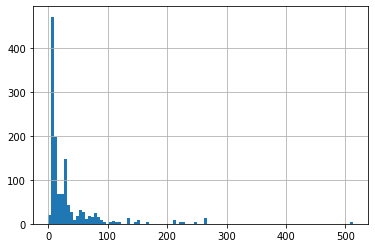

In [ ]:
print("Histogram dla 100 klas")
df_all['Fare'].hist(bins=100);

Skala logarytmiczna


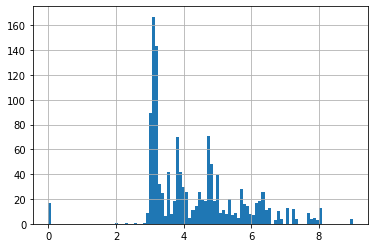

In [ ]:
print("Skala logarytmiczna")
np.log2( df_all['Fare'] + 1 ).hist(bins=100)

### **Cabin**

In [ ]:
df = df_all.copy()
# unikalne wartości kabin
print(df['Cabin'].unique())
print()
# jeśli nie ma kabiny to wpisz missing, a jeśli ma to pobierz pierwszą literę
df['cabin_norm'] = df['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] )
print(df["cabin_norm"])
print()
# rozkład nowej kolumny
print(df.cabin_norm.value_counts())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34' 'A9' 'C31' 'B61' 'C5

### **Ticket**

In [ ]:
df['Ticket'].value_counts()

CA. 2343             11
1601                  8
CA 2144               8
3101295               7
347077                7
                     ..
345364                1
STON/O 2. 3101273     1
STON/O 2. 3101286     1
65306                 1
233866                1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
df[ df.Ticket == 'CA. 2343' ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_norm,title_norm_cat,cabin_norm
159,160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,NaN,S,master,master,3,missing
180,181,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,miss,miss,2,missing
201,202,0,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,NaN,S,mr,mr,0,missing
324,325,0,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,NaN,S,mr,mr,0,missing
792,793,0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,miss,miss,2,missing
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,NaN,S,mr,mr,0,missing
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,miss,miss,2,missing
188,1080,0,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,NaN,S,miss,miss,2,missing
342,1234,1,3,"Sage, Mr. John George",male,29.0,1,9,CA. 2343,69.55,NaN,S,mr,mr,0,missing
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,master,master,3,missing


### **Last name**

In [ ]:
print("Przypomnienie Name")
print(df_all["Name"])

print()
print("Same nazwiska")
print(df_all['Name'].map(lambda x: x.split(',')[0]).value_counts())

Przypomnienie Name
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

Same nazwiska
Sage            11
Andersson       11
Asplund          8
Goodwin          8
Davies           7
                ..
Trout            1
Sivola           1
Van der hoef     1
Nourney          1
Barber           1
Name: Name, Length: 875, dtype: int64


In [ ]:
df_all[ df_all.Name.map(lambda x: x.split(',')[0] == 'Andersson' ) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_norm,title_norm_cat
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,mr,mr,0
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,miss,miss,2
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,miss,miss,2
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,mr,mr,0
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,miss,miss,2
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,miss,miss,2
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,mrs,mrs,1
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,miss,miss,2
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,master,master,3
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,miss,miss,2


## **XGBoost**

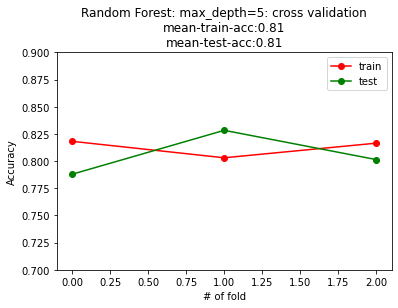

In [ ]:
model = xgb.XGBClassifier(max_depth=3, n_estimators=15, subsample=0.8, random_state=2018)
# był ker error więc dopisałem return_train_score=True
result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_train_score=True)
plot_result("Random Forest: max_depth=%s" % max_depth, result, ylim=(0.7, 0.9))

# **Moje badanie czy dana osoba przeżyje**

In [ ]:
print("Od nowa wczytuję zbiór treningowy.")
df_train = load_titanic_data("train.csv")
print(df_train)

print()
print("Od nowa wczytuję zbiór testowy.")
df_test = load_titanic_data("test.csv")
print(df_test)

Od nowa wczytuję zbiór treningowy.
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

Od nowa wczytuję zbiór testowy.
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN  

In [ ]:
print("Kolumny zbioru df_train")
print(df_train.columns)
 
# print()
# print("Opłaty pasażerów z 2 klasy.")
# print(df_train["Fare"][df_train["Pclass"] == 2])
 
# print()
# print("Rozkład opłat pasażerów z 2 klasy.")
# print(df_train["Fare"][df_train["Pclass"] == 2].value_counts())
 
# print()
# print("Rozkład kabin pasażerów z 2 klasy.")
# print(df_train["Cabin"][df_train["Pclass"] == 2].value_counts())
 
passenger_class = 1
print("Rozkłady wszystkich cech pasażerów z", passenger_class, "klasy.")
for column_name in df_train.columns:
    print()
    print("Rozkład", column_name, "pasażerów z", passenger_class, "klasy o płci male.")
    print(df_train[column_name][df_train["Pclass"] == passenger_class][df_train["Sex"] == "male"].value_counts())
    print()
    print("Rozkład", column_name, "pasażerów z", passenger_class, "klasy o płci female.")
    print(df_train[column_name][df_train["Pclass"] == passenger_class][df_train["Sex"] == "female"].value_counts())

Kolumny zbioru df_train
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Rozkłady wszystkich cech pasażerów z 1 klasy.

Rozkład PassengerId pasażerów z 1 klasy o płci male.
767    1
573    1
93     1
65     1
439    1
      ..
691    1
695    1
186    1
699    1
513    1
Name: PassengerId, Length: 122, dtype: int64

Rozkład PassengerId pasażerów z 1 klasy o płci female.
766    1
854    1
32     1
821    1
291    1
      ..
592    1
338    1
514    1
830    1
384    1
Name: PassengerId, Length: 94, dtype: int64

Rozkład Survived pasażerów z 1 klasy o płci male.
0    77
1    45
Name: Survived, dtype: int64

Rozkład Survived pasażerów z 1 klasy o płci female.
1    91
0     3
Name: Survived, dtype: int64

Rozkład Pclass pasażerów z 1 klasy o płci male.
1    122
Name: Pclass, dtype: int64

Rozkład Pclass pasażerów z 1 klasy o płci female.
1    94
Name: Pclass, dtype: int64

Rozkład Name p

In [ ]:
passengers_dict = {
    "PassengerId": [1310, 1311, 1312, 1313, 1314],
    "Pclass": [1, 1, 1, 2, 1],
    "Name": ["Aniston, Mrs. Jeny", "Lopez, Mrs. Jenifer", "Madonna, Mrs. Irina", "NN Mrs. K", "Bond Mr. James"],
    "Sex": ["female", "female", "female", "female" ,"male"],
    "Age": [35.0, 24.0, 40.0, 28.5, 31.0],
    "SibSp": [0, 1, 1, 2, 0],
    "Parch": [0, 2, 1, 0, 1],
    "Ticket": [347077, 52243, 32131, 5355, 37389],
    "Fare": [13.0, 34.0, 23.0, 30.0, 29.0],
    "Cabin": ["C125", "E36", "C83", "E36", "C83"],
    "Embarked": ["S", "Q", "C", "Q", "C"]
}
    
print("Słownik")
print(passengers_dict)
 
print()
df_passengers = pd.DataFrame(data = passengers_dict)
print("DataFrame")
print(df_passengers)

Słownik
{'PassengerId': [1310, 1311, 1312, 1313, 1314], 'Pclass': [1, 1, 1, 2, 1], 'Name': ['Aniston, Mrs. Jeny', 'Lopez, Mrs. Jenifer', 'Madonna, Mrs. Irina', 'NN Mrs. K', 'Bond Mr. James'], 'Sex': ['female', 'female', 'female', 'female', 'male'], 'Age': [35.0, 24.0, 40.0, 28.5, 31.0], 'SibSp': [0, 1, 1, 2, 0], 'Parch': [0, 2, 1, 0, 1], 'Ticket': [347077, 52243, 32131, 5355, 37389], 'Fare': [13.0, 34.0, 23.0, 30.0, 29.0], 'Cabin': ['C125', 'E36', 'C83', 'E36', 'C83'], 'Embarked': ['S', 'Q', 'C', 'Q', 'C']}

DataFrame
   PassengerId  Pclass                 Name  ...  Fare  Cabin  Embarked
0         1310       1   Aniston, Mrs. Jeny  ...  13.0   C125         S
1         1311       1  Lopez, Mrs. Jenifer  ...  34.0    E36         Q
2         1312       1  Madonna, Mrs. Irina  ...  23.0    C83         C
3         1313       2            NN Mrs. K  ...  30.0    E36         Q
4         1314       1       Bond Mr. James  ...  29.0    C83         C

[5 rows x 11 columns]


In [ ]:
print(df_train)  # wyjściowy zbiór treningowy się nie zmienił
print(df_train.info())
make_prediction(df_train, df_passengers, LogisticRegression(), 'moje_linear_passengers.csv')

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P